In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme()

In [2]:
df = pd.read_csv("tele2_dataset.csv", parse_dates=['date', 'event_time'], )

In [88]:
df.head()

,date,campaign,source,medium,device,client_id,session_id,event_time,event_name,current_tariff,is_LSE_member,user_auth,user_type,region_name,age,gender,rfm_index,have_home_inet
0,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:23:11,Покупка,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
1,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:49,Клик на кнопку Продолжить 3 (Экран выбора спос...,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
2,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:19,Ввод контактного номера,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
3,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:59,Клик на кнопку Продолжить 4 (Экран выбора адре...,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
4,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:21,Ввод имени,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174185 entries, 0 to 174184
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            174185 non-null  datetime64[ns]
 1   campaign        174185 non-null  object        
 2   source          174185 non-null  object        
 3   medium          174185 non-null  object        
 4   device          174185 non-null  object        
 5   client_id       174185 non-null  object        
 6   session_id      174185 non-null  int64         
 7   event_time      174185 non-null  datetime64[ns]
 8   event_name      174185 non-null  object        
 9   current_tariff  47688 non-null   object        
 10  is_LSE_member   47688 non-null   float64       
 11  user_auth       174185 non-null  int64         
 12  user_type       47688 non-null   object        
 13  region_name     174185 non-null  object        
 14  age             174185 non-null  obj

In [57]:
df_clients = df[['client_id', 'is_LSE_member', 'user_auth', 'user_type', 'region_name', 'age', 'gender', 'rfm_index', 'have_home_inet']][df['user_auth'] == 1].drop_duplicates(subset=['client_id'])
df_clients['have_home_inet'] = df_clients['have_home_inet'].apply(lambda x: bool(x)) 
df_clients.head()

,client_id,is_LSE_member,user_auth,user_type,region_name,age,gender,rfm_index,have_home_inet
0,117251283.164232,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,False
216,1760047392.166496,0.0,1,B2C,CHELYABINSK,25 - 39 лет,Male,411.0,False
296,63759458.166733,1.0,1,B2C,NNOV,25 - 39 лет,Female,122.0,False
571,718880971.166721,1.0,1,B2C,SPB,40 - 54 года,Female,241.0,False
608,1664960769.166496,0.0,1,B2C,CHELYABINSK,25 - 39 лет,Female,142.0,False


In [9]:
df_clients.shape

(10381, 9)

In [10]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10381 entries, 0 to 174184
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       10381 non-null  object 
 1   is_LSE_member   10381 non-null  float64
 2   user_auth       10381 non-null  int64  
 3   user_type       10381 non-null  object 
 4   region_name     10381 non-null  object 
 5   age             10381 non-null  object 
 6   gender          10381 non-null  object 
 7   rfm_index       10381 non-null  float64
 8   have_home_inet  10381 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 811.0+ KB


In [12]:
df_clients.client_id.unique().shape, df_clients.shape 

((10381,), (10381, 9))

In [ ]:
df.age.unique()

In [13]:
def good_age(age):
    return {'25 - 39 лет': 2, 
    '18 - 24 года': 1, 
    '54+': 4, 
    '40 - 54 года': 3,
    'До 18 лет': 0}[age]

In [67]:
df_clients.sort_values('age', key=lambda col: col.apply(good_age))[['age', 'have_home_inet', 'gender']]

,age,have_home_inet,gender
94974,До 18 лет,False,Male
36039,До 18 лет,False,Female
163635,До 18 лет,False,Female
128696,До 18 лет,False,Male
54026,До 18 лет,False,Female
...,...,...,...
15444,54+,False,Male
27928,54+,False,Female
15426,54+,False,Female
131477,54+,False,Female


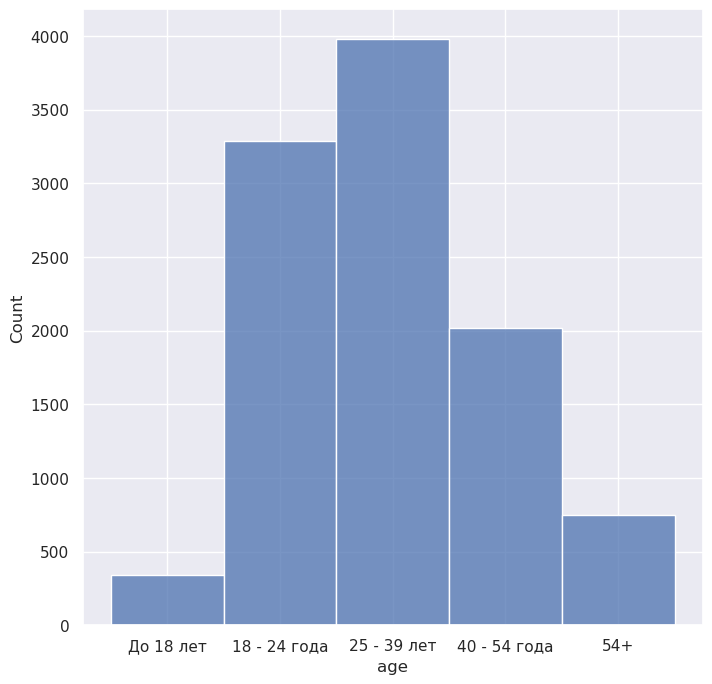

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x=df_clients.sort_values('age', key=lambda col: col.apply(good_age))['age'], ax=ax)

plt.show()

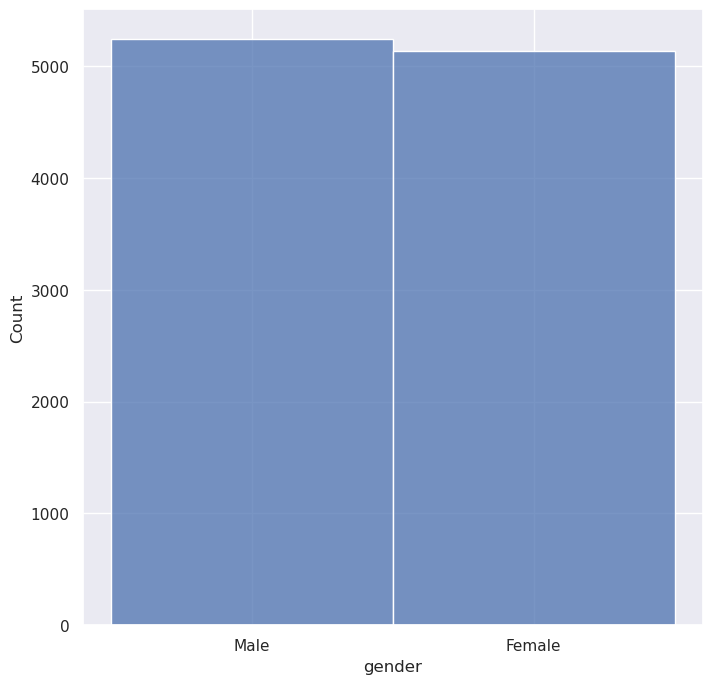

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x=df_clients['gender'], ax=ax)

plt.show()

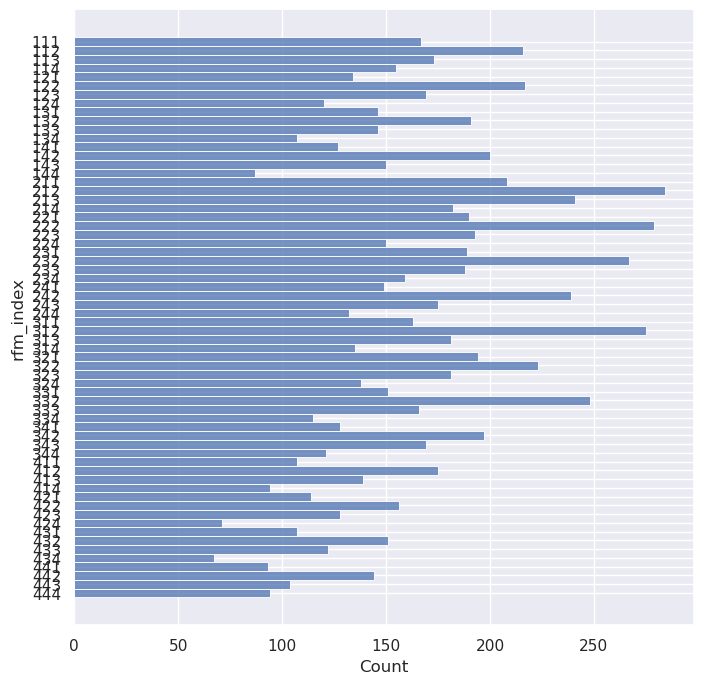

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(y=df_clients.sort_values('rfm_index')['rfm_index'].apply(lambda x: str(int(x))), binwidth=3,ax=ax)

plt.show()

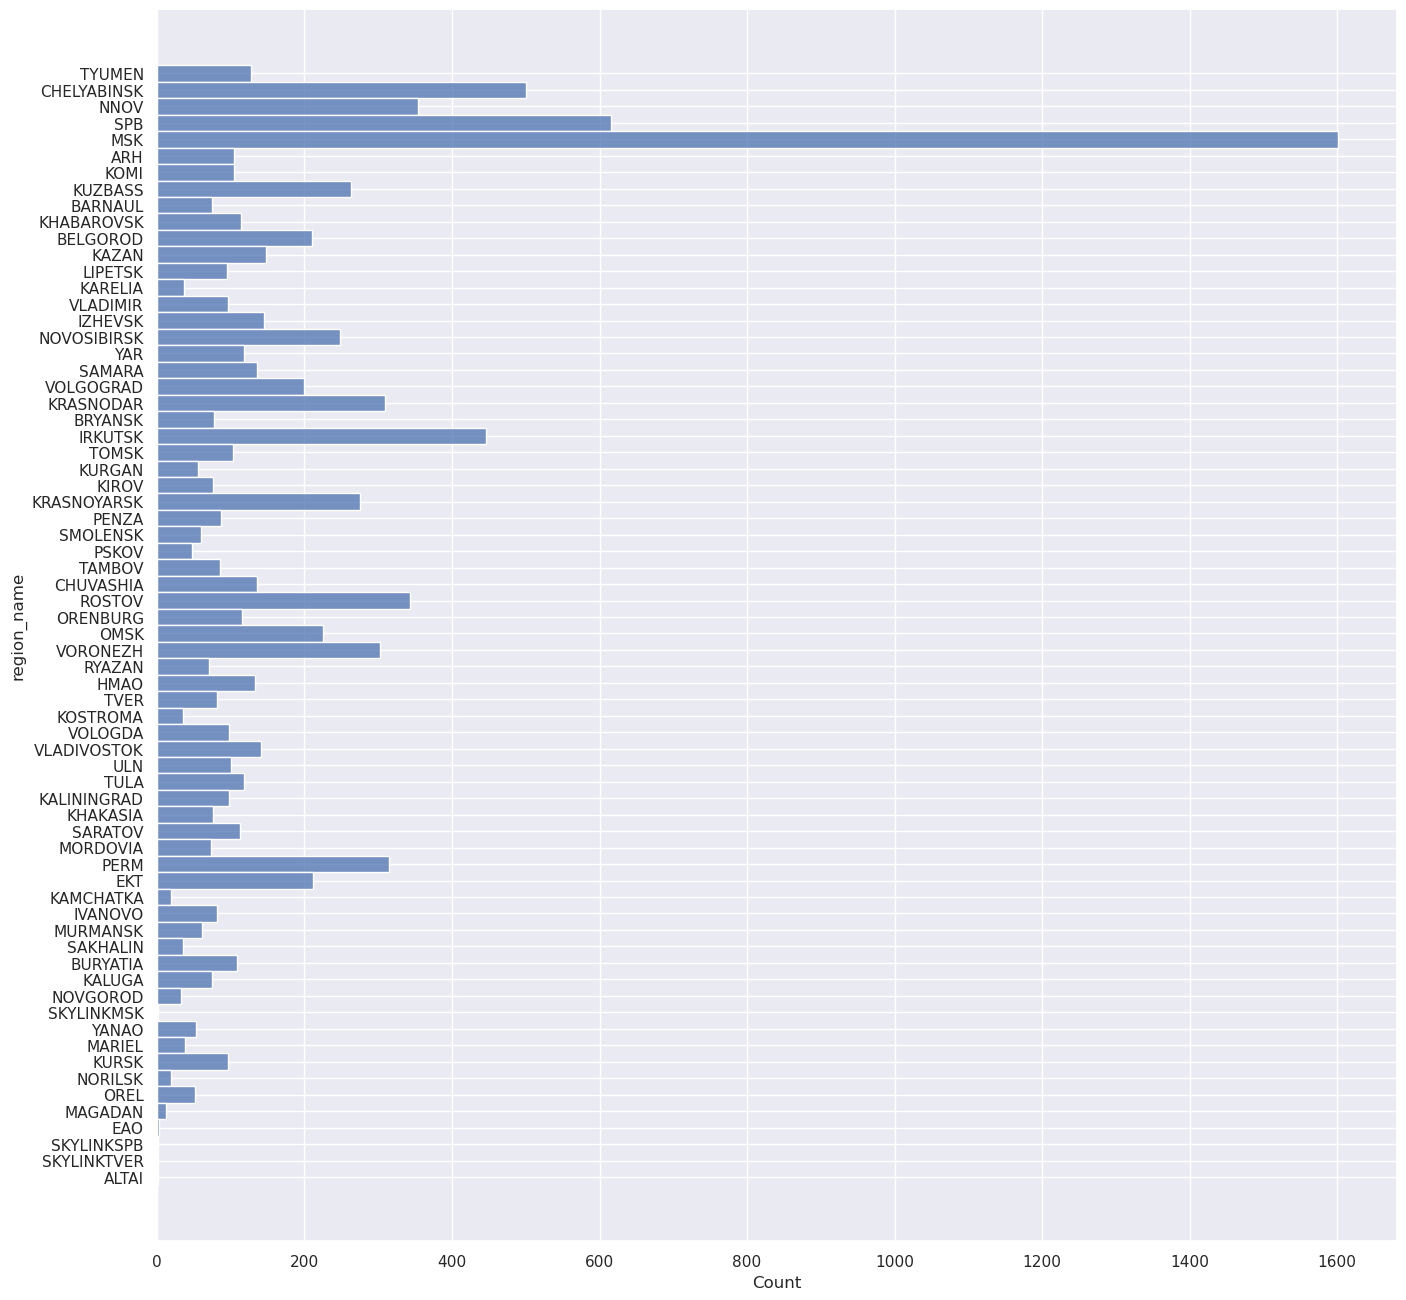

In [94]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.histplot(y=df_clients['region_name'], ax=ax)

plt.show()

In [48]:
df_clients.sort_values('region_name')

,client_id,is_LSE_member,user_auth,user_type,region_name,age,gender,rfm_index,have_home_inet
167348,1506588972.1669714278,0.0,1,B2C,ALTAI,18 - 24 года,Male,243.0,1.0
164090,1548619919.1654604870,0.0,1,B2C,ALTAI,54+,Female,433.0,0.0
50290,269478419.1667902225,0.0,1,B2C,ARH,До 18 лет,Female,442.0,0.0
165094,1133067434.1666470555,0.0,1,B2C,ARH,18 - 24 года,Male,343.0,0.0
159428,962802627.166958,0.0,1,B2C,ARH,18 - 24 года,Male,331.0,0.0
...,...,...,...,...,...,...,...,...,...
93626,374654573.16685,0.0,1,B2C,YAR,25 - 39 лет,Female,333.0,0.0
94812,498831920.166661,1.0,1,B2C,YAR,18 - 24 года,Female,421.0,0.0
95021,1382158383.166854,1.0,1,B2C,YAR,40 - 54 года,Male,422.0,1.0
27834,1024512044.166756,0.0,1,B2C,YAR,18 - 24 года,Male,242.0,0.0


In [52]:
df_clients[['region_name', 'user_auth']].groupby('region_name',as_index=False).agg('sum')

,region_name,user_auth
0,ALTAI,2
1,ARH,105
2,BARNAUL,75
3,BELGOROD,210
4,BRYANSK,77
...,...,...
63,VOLGOGRAD,199
64,VOLOGDA,97
65,VORONEZH,303
66,YANAO,53


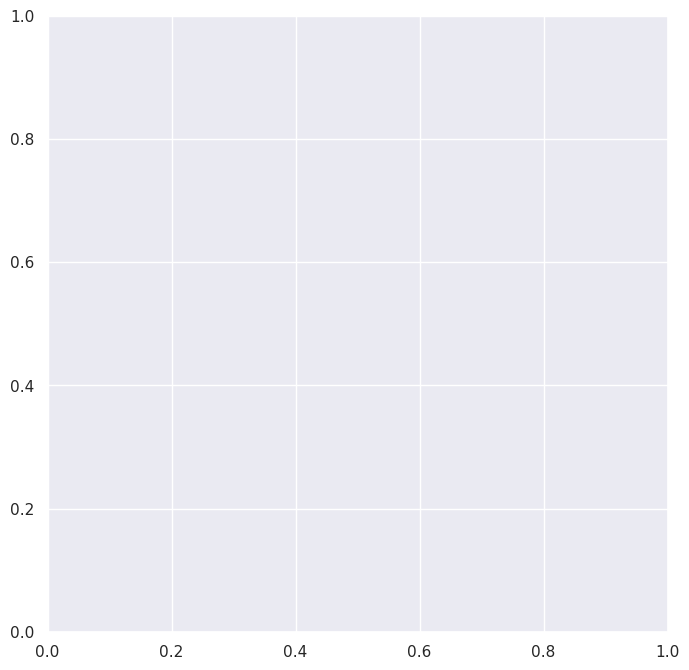

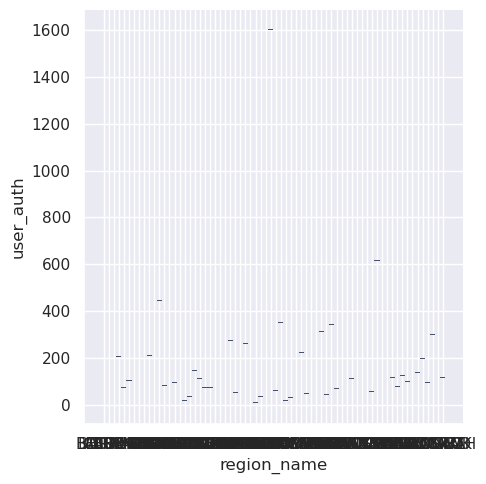

In [84]:
'''
fig, ax = plt.subplots(figsize=(8, 8))
sns.displot(data=df_clients[['region_name', 'user_auth']].groupby('region_name',as_index=False).agg('sum'), x='region_name', y='user_auth', binwidth=3,ax=ax)

plt.show()
'''

In [46]:
df['region_name'].unique()

array(['TYUMEN', 'KHABAROVSK', 'MSK', 'CHELYABINSK', 'BARNAUL', 'NNOV',
       'VLADIVOSTOK', 'KURSK', 'SPB', 'KAZAN', 'KRASNOYARSK', 'HMAO',
       'ORENBURG', 'EKT', 'TULA', 'OMSK', 'VLADIMIR', 'NORILSK', 'YANAO',
       'KUZBASS', 'IRKUTSK', 'ULN', 'ROSTOV', 'KALUGA', 'SARATOV', 'PERM',
       'MORDOVIA', 'KARELIA', 'ARH', 'KOMI', 'BRYANSK', 'BELGOROD',
       'KRASNODAR', 'NOVGOROD', 'IVANOVO', 'YAR', 'TAMBOV', 'VORONEZH',
       'PSKOV', 'KAMCHATKA', 'LIPETSK', 'KURGAN', 'IZHEVSK', 'CHUVASHIA',
       'NOVOSIBIRSK', 'TVER', 'SMOLENSK', 'BURYATIA', 'SAMARA', 'PENZA',
       'RYAZAN', 'MURMANSK', 'VOLGOGRAD', 'KOSTROMA', 'TOMSK', 'KIROV',
       'VOLOGDA', 'MARIEL', 'OREL', 'KALININGRAD', 'KHAKASIA', 'EAO',
       'SAKHALIN', 'SKYLINKMSK', 'ALTAI', 'MAGADAN', 'SKYLINKSPB',
       'SKYLINKTVER'], dtype=object)

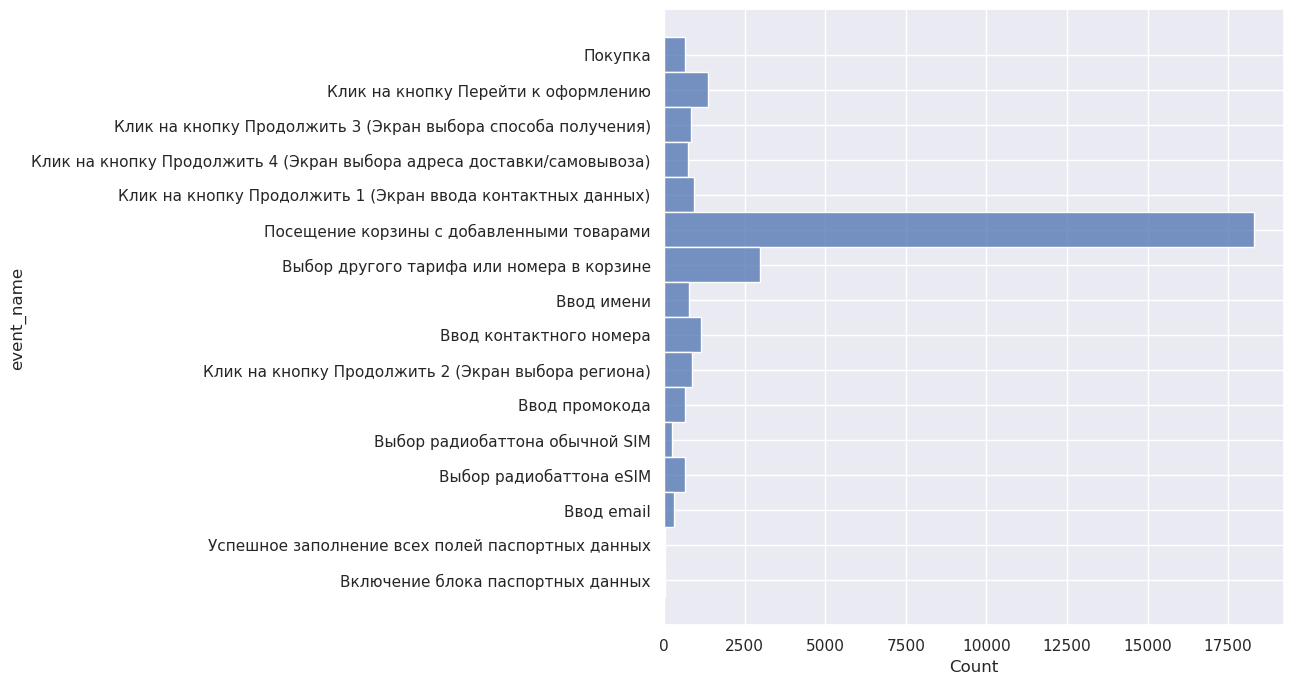

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(y=df.drop_duplicates(['session_id'])['event_name'], ax=ax)

plt.show()

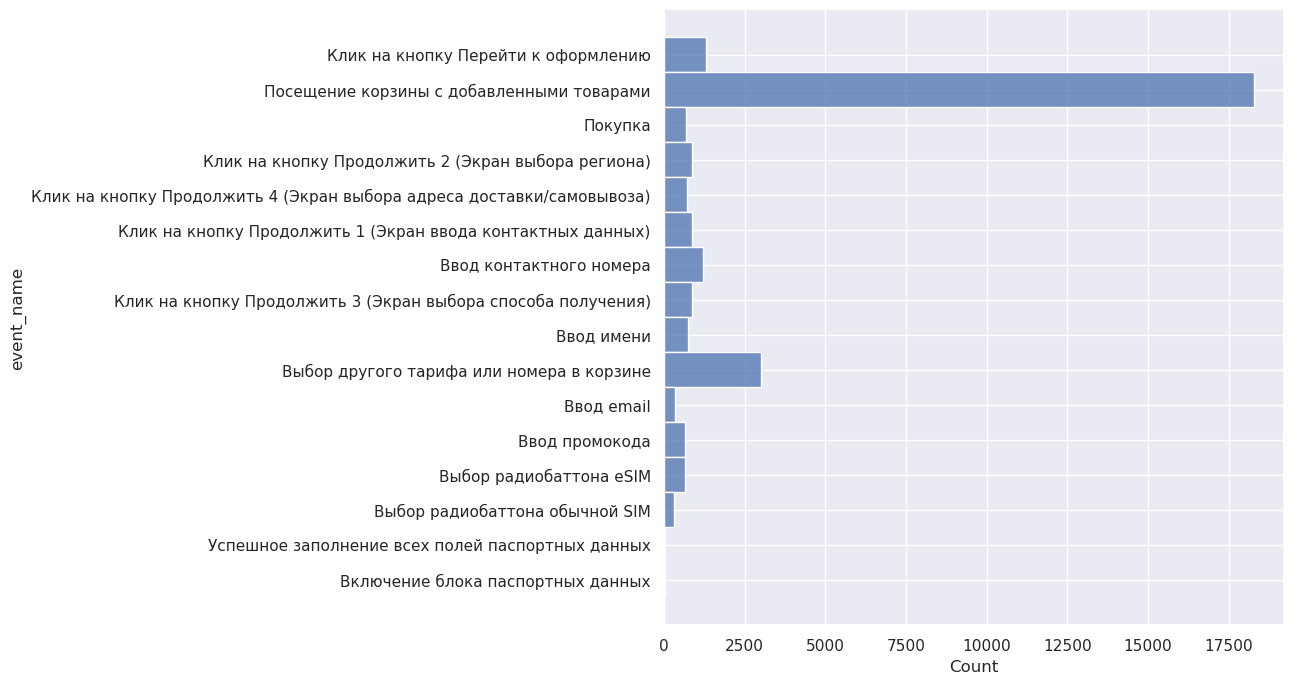

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(y=df.drop_duplicates(['session_id'], keep='last')['event_name'],ax=ax)

plt.show()

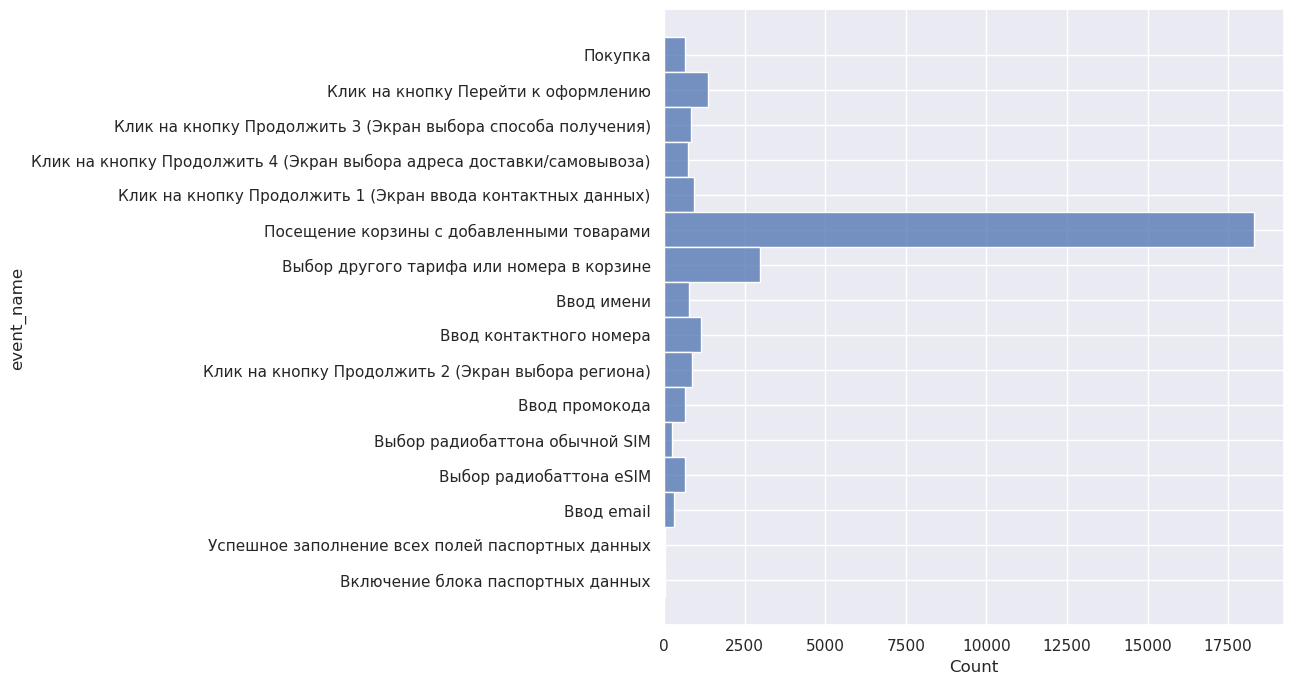

In [89]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(y=df.drop_duplicates(['session_id'], keep='first')['event_name'],ax=ax)

plt.show()

In [87]:
df_clients.drop_duplicates()

,client_id,is_LSE_member,user_auth,user_type,region_name,age,gender,rfm_index,have_home_inet
0,117251283.164232,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,False
216,1760047392.166496,0.0,1,B2C,CHELYABINSK,25 - 39 лет,Male,411.0,False
296,63759458.166733,1.0,1,B2C,NNOV,25 - 39 лет,Female,122.0,False
571,718880971.166721,1.0,1,B2C,SPB,40 - 54 года,Female,241.0,False
608,1664960769.166496,0.0,1,B2C,CHELYABINSK,25 - 39 лет,Female,142.0,False
...,...,...,...,...,...,...,...,...,...
174178,1085561478.1669827294,0.0,1,B2C,VOLGOGRAD,25 - 39 лет,Male,443.0,False
174180,5638055.1669796789,0.0,1,B2C,SPB,25 - 39 лет,Male,332.0,False
174181,1171786665.1669820193,0.0,1,B2C,PERM,54+,Male,213.0,False
174183,346641068.1669795929,0.0,1,B2C,KRASNOYARSK,18 - 24 года,Female,332.0,True


In [95]:
df.campaign.unique()

array(['eshop_art_alw_sim_none_yandex_search_brand-product-tariffs_all-devices_none_rf',
       '(not set)',
       'eshop_art_alw_sim_none_yandex_search_brand-shop_all-devices_none_rf',
       'mar_art_flight_flight-8_oct-2022_yandex_search_kpz_all-devices_none_regions',
       'referral_program',
       'mar_art_flight_flight-8_oct-2022_yandex_search_kpz_all-devices_none_msk',
       '45812', '99336', '99333', '81074', '742196', '640331',
       'eshop_art_alw_sim_none_yandex_search_autotargeting_all-devices_none_msk',
       'eshop_art_alw_sim_none_yandex_search_brand-product-tariff-ustroystvo_all-devices_none_rf',
       'mar_art_flight_flight-8_oct-2022_yandex_search_general_all-devices_none_regions',
       'eshop_art_alw_sim_none_yandex_search_brand-product-numbers_all-devices_none_rf',
       'eshop_art_alw_sim_none_yandex_search_autotargeting_all-devices_none_rf',
       '52519', '76K20A',
       'eshop_art_alw_sim_none_yandex_search_brand-product-classic_all-devices_test-A_rf

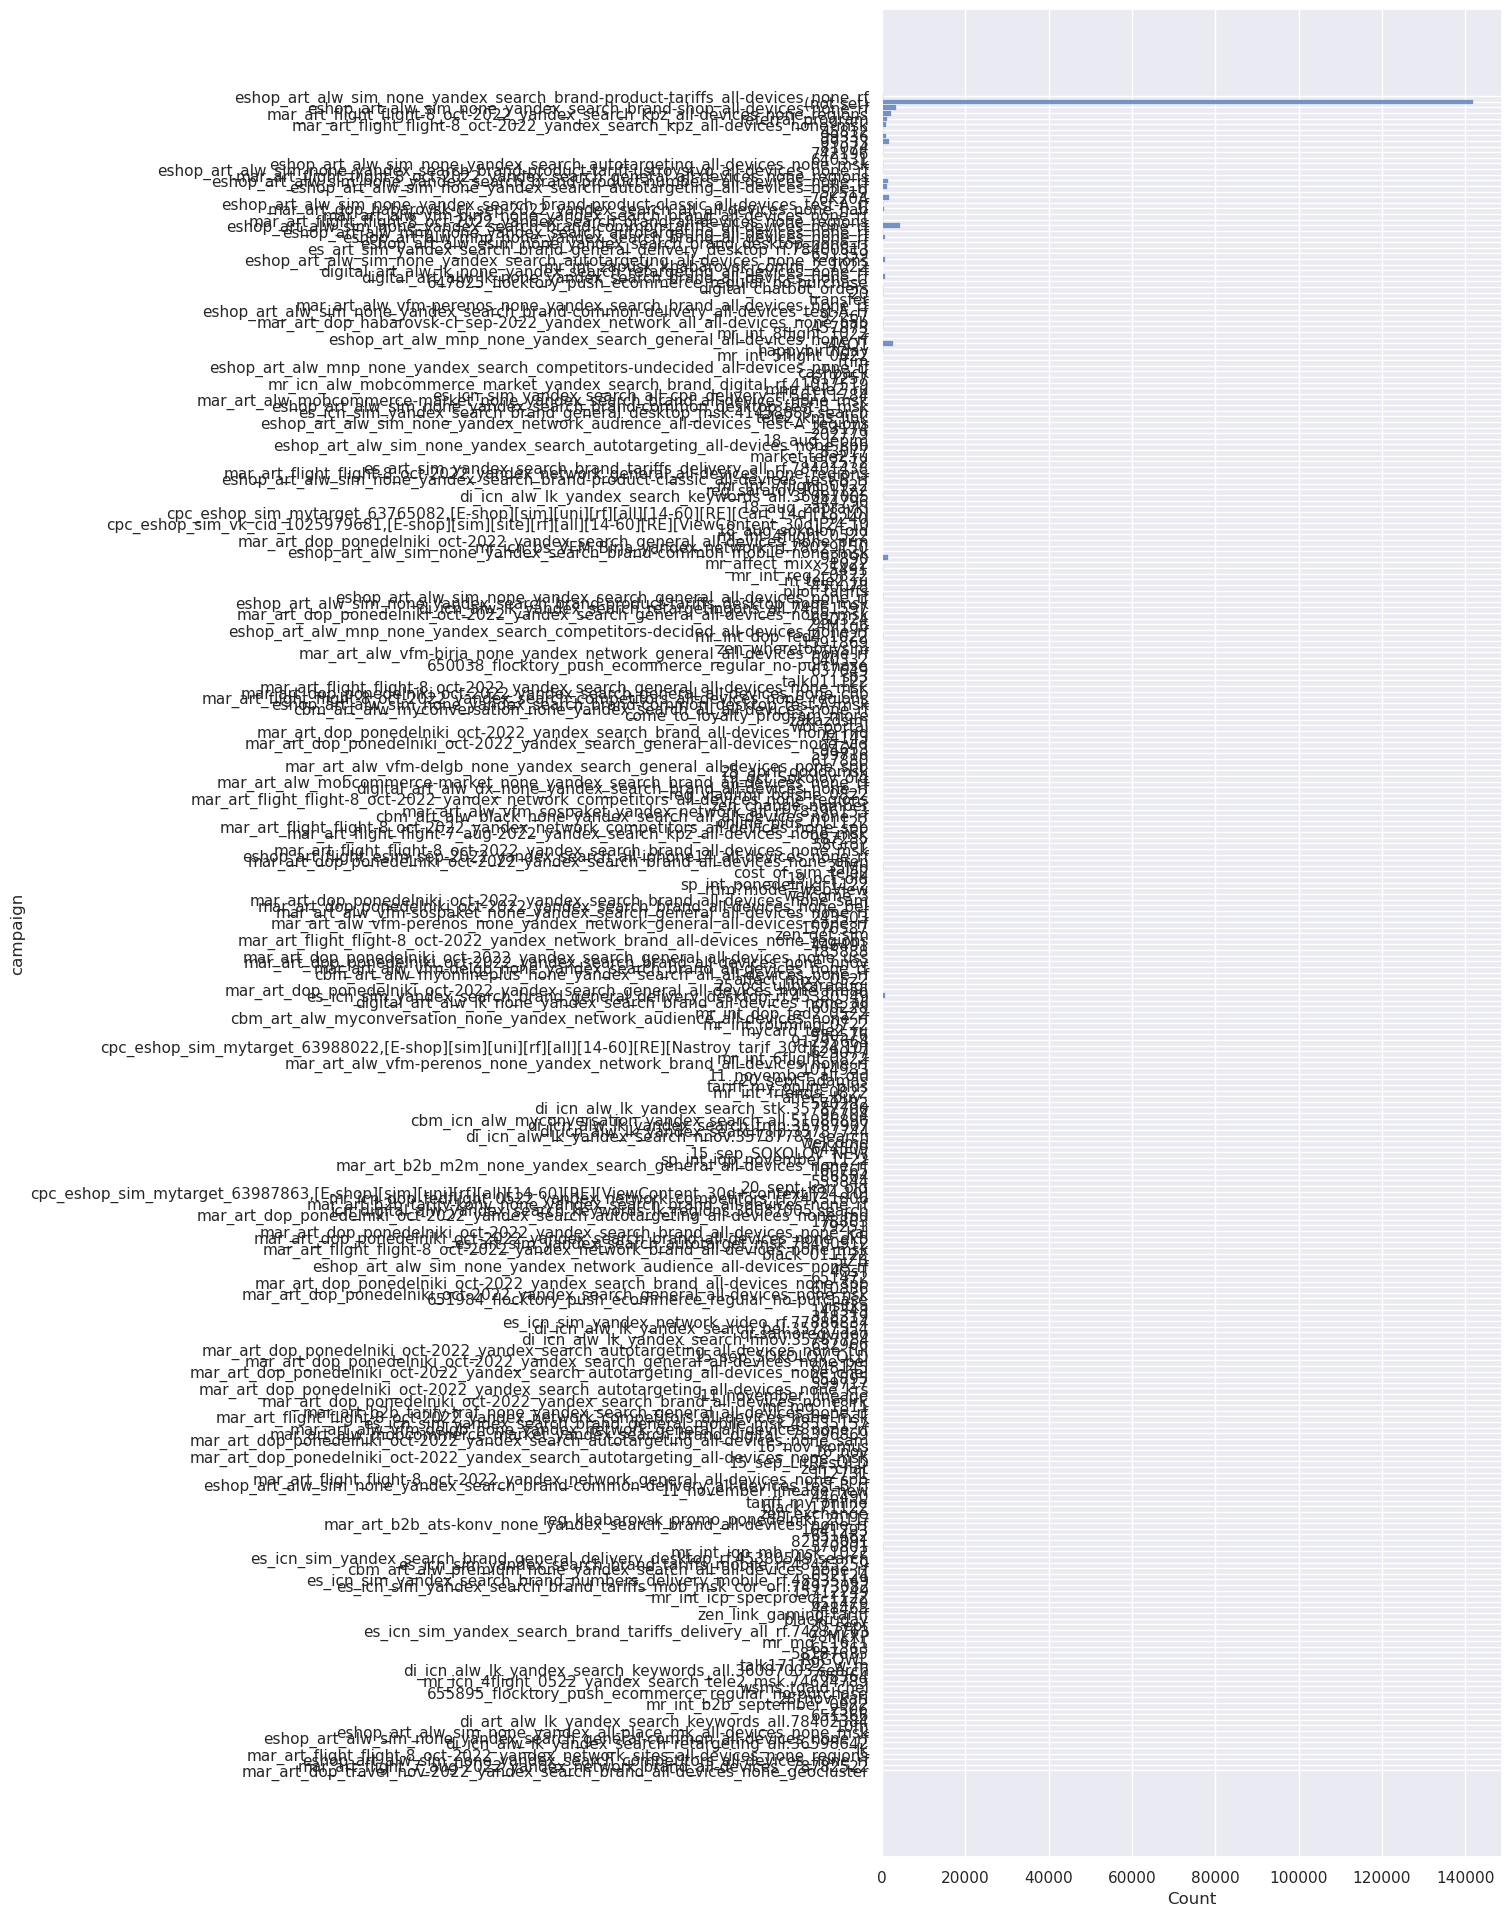

In [103]:
fig, ax = plt.subplots(figsize=(8, 24))
sns.histplot(y=df['campaign'],ax=ax)

plt.show()

In [98]:
df[df['event_name'] == 'Покупка'].shape

(8974, 18)

In [112]:
df[df['event_name'] == 'Клик на кнопку Перейти к оформлению'].shape

(13958, 18)

In [101]:
df[(df['event_name'] == 'Покупка') & (df['campaign'] == '(not set)')].shape

(7290, 18)

In [102]:
7290 / 8974

0.8123467795854691

In [104]:
df[df['session_id'] == 5988994287612526860]

,date,campaign,source,medium,device,client_id,session_id,event_time,event_name,current_tariff,is_LSE_member,user_auth,user_type,region_name,age,gender,rfm_index,have_home_inet
0,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:23:11,Покупка,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
1,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:49,Клик на кнопку Продолжить 3 (Экран выбора спос...,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
2,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:19,Ввод контактного номера,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
3,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:59,Клик на кнопку Продолжить 4 (Экран выбора адре...,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
4,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:21,Ввод имени,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
5,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:23,Ввод email,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
6,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:45,Клик на кнопку Продолжить 2 (Экран выбора реги...,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
7,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:16:25,Посещение корзины с добавленными товарами,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
8,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:21:36,Выбор другого тарифа или номера в корзине,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0
9,2022-11-01,eshop_art_alw_sim_none_yandex_search_brand-pro...,yandex,cpc,desktop,117251283.164232,5988994287612526860,2022-11-01 12:22:43,Клик на кнопку Продолжить 1 (Экран ввода конта...,Мой разговор,0.0,1,B2C,TYUMEN,25 - 39 лет,Male,141.0,0.0


In [105]:
df[(df['event_name'] == 'Покупка') & (df['gender'] == 'Male')].shape

(4428, 18)

In [106]:
df[(df['event_name'] == 'Покупка') & (df['gender'] == 'Female')].shape

(4546, 18)

In [108]:
df.drop_duplicates('session_id')['rfm_index'].shape

(30544,)

In [119]:
df.campaign.dropna().shape

(174185,)

In [110]:
print('D:\t' * 10000)  

D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D:	D

In [116]:
sorted(df['region_name'].unique())

['ALTAI',
 'ARH',
 'BARNAUL',
 'BELGOROD',
 'BRYANSK',
 'BURYATIA',
 'CHELYABINSK',
 'CHUVASHIA',
 'EAO',
 'EKT',
 'HMAO',
 'IRKUTSK',
 'IVANOVO',
 'IZHEVSK',
 'KALININGRAD',
 'KALUGA',
 'KAMCHATKA',
 'KARELIA',
 'KAZAN',
 'KHABAROVSK',
 'KHAKASIA',
 'KIROV',
 'KOMI',
 'KOSTROMA',
 'KRASNODAR',
 'KRASNOYARSK',
 'KURGAN',
 'KURSK',
 'KUZBASS',
 'LIPETSK',
 'MAGADAN',
 'MARIEL',
 'MORDOVIA',
 'MSK',
 'MURMANSK',
 'NNOV',
 'NORILSK',
 'NOVGOROD',
 'NOVOSIBIRSK',
 'OMSK',
 'OREL',
 'ORENBURG',
 'PENZA',
 'PERM',
 'PSKOV',
 'ROSTOV',
 'RYAZAN',
 'SAKHALIN',
 'SAMARA',
 'SARATOV',
 'SKYLINKMSK',
 'SKYLINKSPB',
 'SKYLINKTVER',
 'SMOLENSK',
 'SPB',
 'TAMBOV',
 'TOMSK',
 'TULA',
 'TVER',
 'TYUMEN',
 'ULN',
 'VLADIMIR',
 'VLADIVOSTOK',
 'VOLGOGRAD',
 'VOLOGDA',
 'VORONEZH',
 'YANAO',
 'YAR']

In [121]:
df_clients['rfm_index'].dropna().shape

(10381,)